Topic 6.07  |  三角网格
# 可视化Dirichlet分布
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
from scipy.stats import dirichlet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 构造重心坐标系

In [2]:
# 定义等边三角形
corners = np.array([[0, 0], [1, 0], [0.5,0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [3]:
# 继续剖分三角形提高颗粒度
refiner = tri.UniformTriRefiner(triangle)
trimesh_8 = refiner.refine_triangulation(subdiv=8)
print('Number of small triangles = ' + str(4**8))

Number of small triangles = 65536


In [4]:
# 自定义函数
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
AREA = 0.5 * 1 * np.sqrt(1 - 0.5**2)
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    # 将直角坐标系 (x, y) 坐标转化为 中心坐标系 (theta_1, theta_2, theta_3)
    BC_coords = np.array([tri_area(xy, pair_idx) for pair_idx in pairs]) / AREA
    BC_coords_ = np.clip(BC_coords, tol, 1.0 - tol)
    BC_coords_ = BC_coords_/BC_coords_.sum() 
    # 归一化
    
    return BC_coords_


In [5]:
# 定义一个绘图函数

def plot_Dirichlet_PDF_contour(alpha_array, subdiv = 8):
    
    refiner = tri.UniformTriRefiner(triangle)
    trimesh_8 = refiner.refine_triangulation(subdiv=subdiv)
    
    PDF = [dirichlet.pdf(xy2bc(xy), alpha_array) for xy in zip(trimesh_8.x, trimesh_8.y)]
    
    fig, ax = plt.subplots(figsize = (5,5))

    plt.tricontourf(trimesh_8, PDF, 
                    levels = 20, 
                    cmap='RdYlBu_r')
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.text(0.8, 0.45,  r'$\theta_1$')
    plt.text(0.15, 0.45, r'$\theta_2$')
    plt.text(0.5, -0.1,  r'$\theta_3$')

    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    plt.title(alpha_array)  
    
    alpha_array_str = ','.join(map(str, alpha_array))
    fig.savefig('Figures/Dirichlet分布PDF_alphas_' + alpha_array_str + '.svg', format='svg')
    

### 不同参数

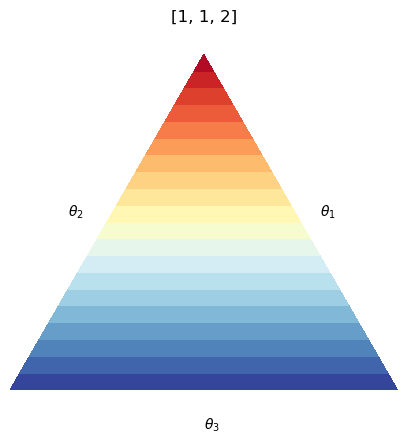

In [6]:
alpha_array = [1, 1, 2]
plot_Dirichlet_PDF_contour(alpha_array)

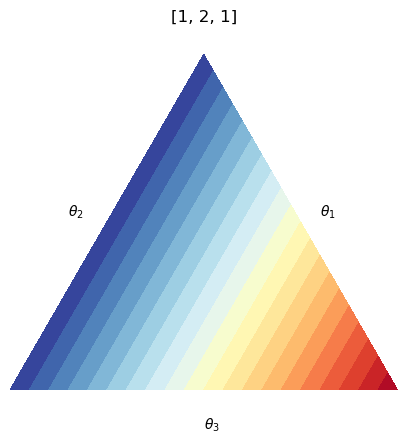

In [9]:
alpha_array = [1, 2, 1]
plot_Dirichlet_PDF_contour(alpha_array)

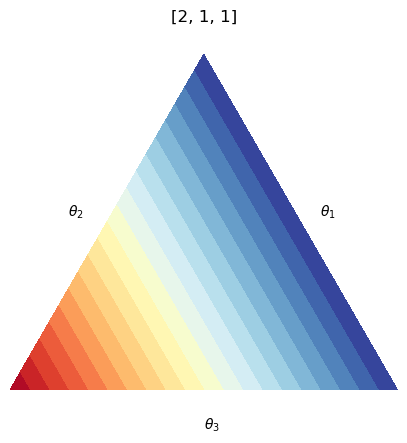

In [10]:
alpha_array = [2, 1, 1]
plot_Dirichlet_PDF_contour(alpha_array)

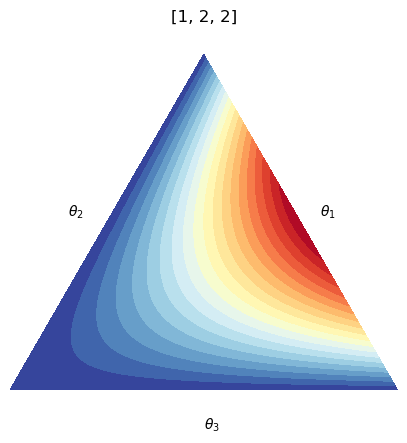

In [11]:
alpha_array = [1, 2, 2]
plot_Dirichlet_PDF_contour(alpha_array)

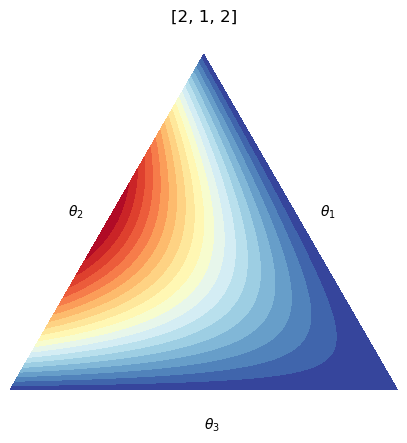

In [12]:
alpha_array = [2, 1, 2]
plot_Dirichlet_PDF_contour(alpha_array)

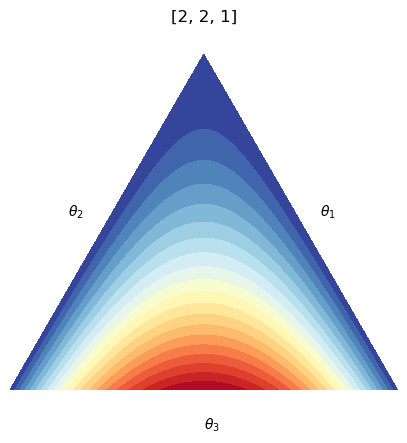

In [13]:
alpha_array = [2, 2, 1]
plot_Dirichlet_PDF_contour(alpha_array)

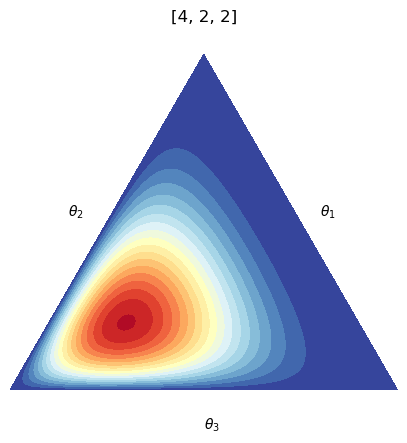

In [14]:
alpha_array = [4, 2, 2]
plot_Dirichlet_PDF_contour(alpha_array)

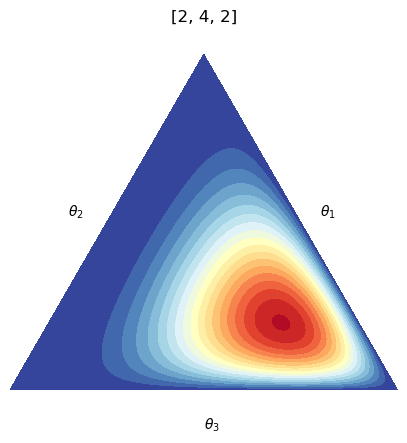

In [15]:
alpha_array = [2, 4, 2]
plot_Dirichlet_PDF_contour(alpha_array)

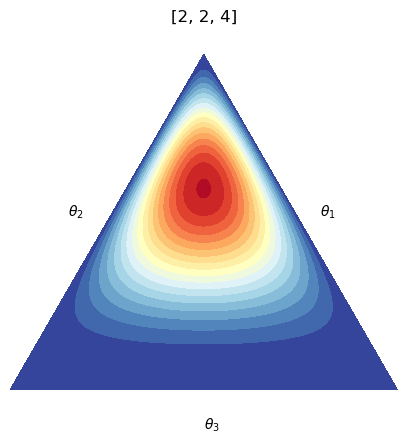

In [16]:
alpha_array = [2, 2, 4]
plot_Dirichlet_PDF_contour(alpha_array)

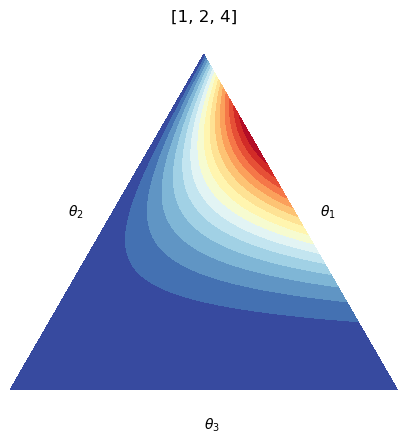

In [17]:
alpha_array = [1, 2, 4]
plot_Dirichlet_PDF_contour(alpha_array)

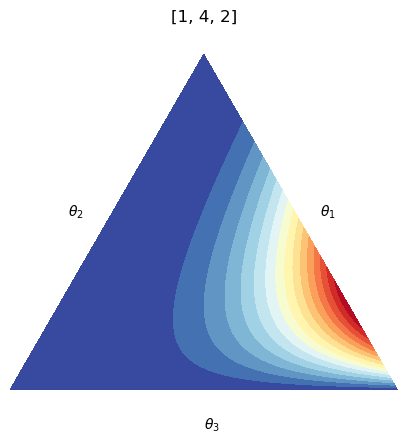

In [18]:
alpha_array = [1,4,2]
plot_Dirichlet_PDF_contour(alpha_array)

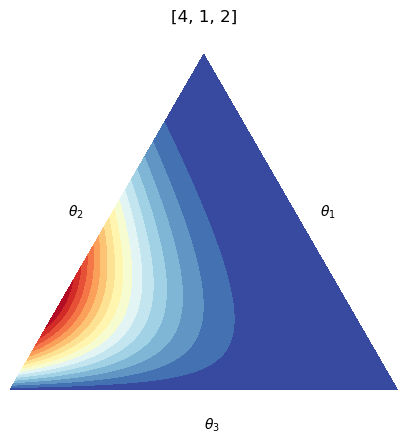

In [19]:
alpha_array = [4,1,2]
plot_Dirichlet_PDF_contour(alpha_array)

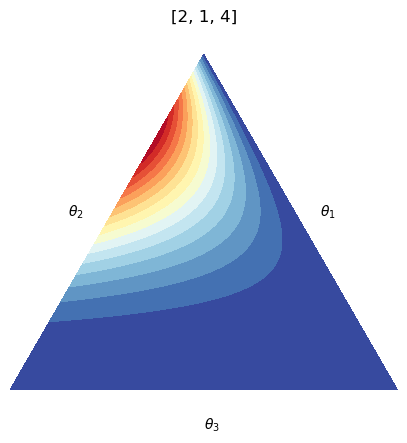

In [20]:
alpha_array = [2,1,4]
plot_Dirichlet_PDF_contour(alpha_array)

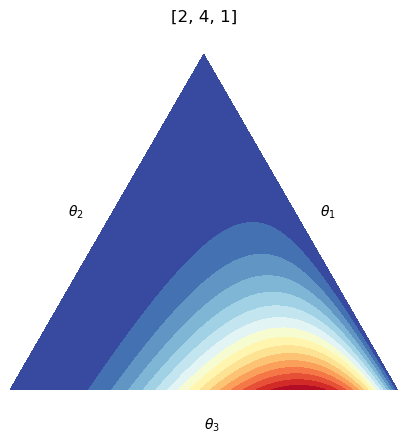

In [21]:
alpha_array = [2,4,1]
plot_Dirichlet_PDF_contour(alpha_array)

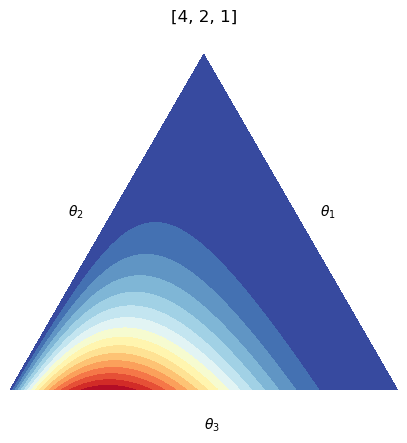

In [22]:
alpha_array = [4,2,1]
plot_Dirichlet_PDF_contour(alpha_array)

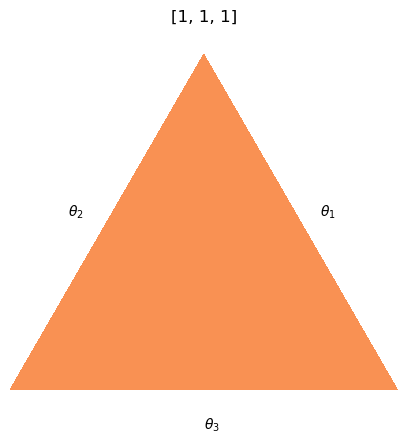

In [23]:
alpha_array = [1,1,1]
plot_Dirichlet_PDF_contour(alpha_array)

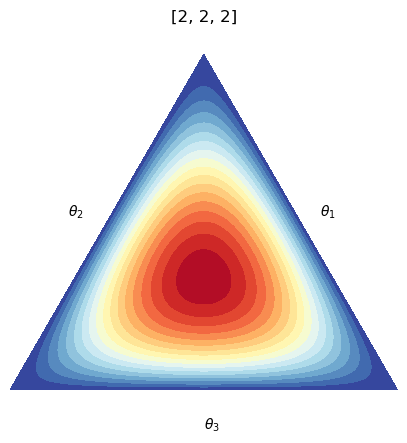

In [24]:
alpha_array = [2,2,2]
plot_Dirichlet_PDF_contour(alpha_array)

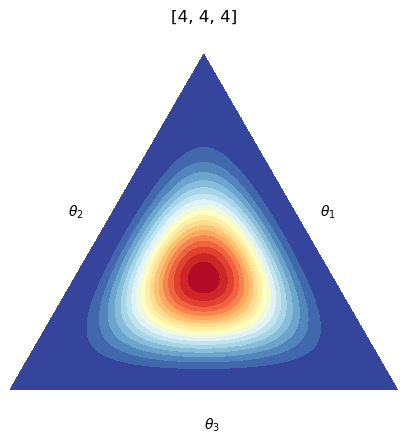

In [25]:
alpha_array = [4,4,4]
plot_Dirichlet_PDF_contour(alpha_array)

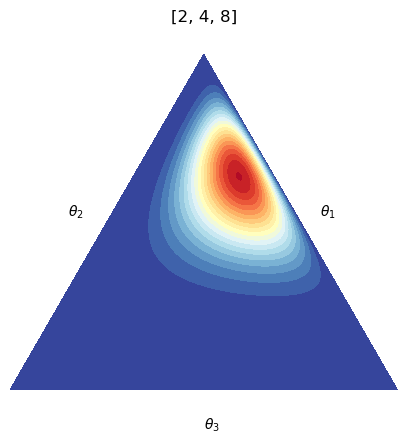

In [26]:
alpha_array = [2, 4, 8]
plot_Dirichlet_PDF_contour(alpha_array)

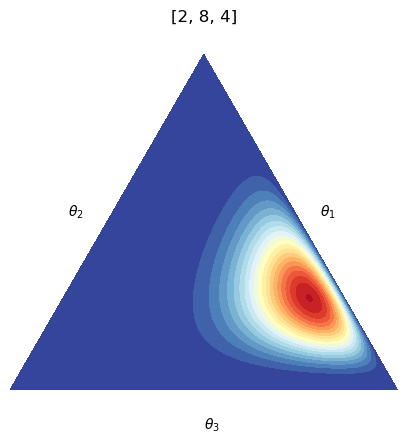

In [27]:
alpha_array = [2, 8, 4]
plot_Dirichlet_PDF_contour(alpha_array)

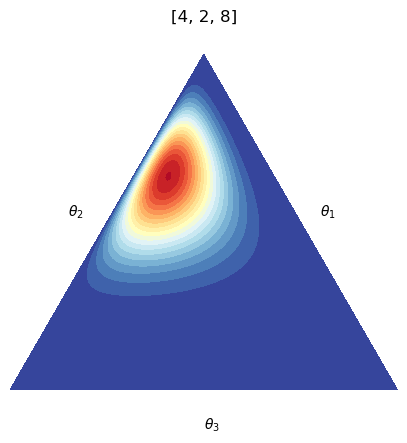

In [28]:
alpha_array = [4, 2, 8]
plot_Dirichlet_PDF_contour(alpha_array)

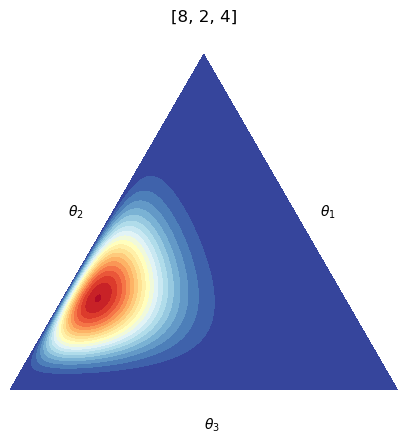

In [29]:
alpha_array = [8, 2, 4]
plot_Dirichlet_PDF_contour(alpha_array)

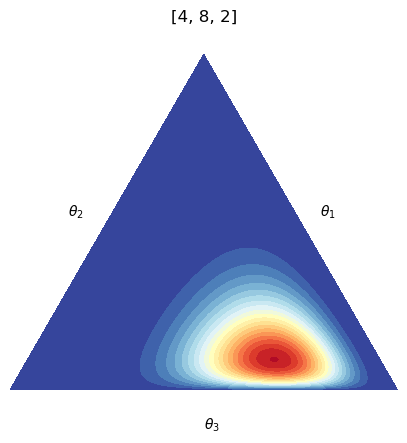

In [30]:
alpha_array = [4, 8, 2]
plot_Dirichlet_PDF_contour(alpha_array)

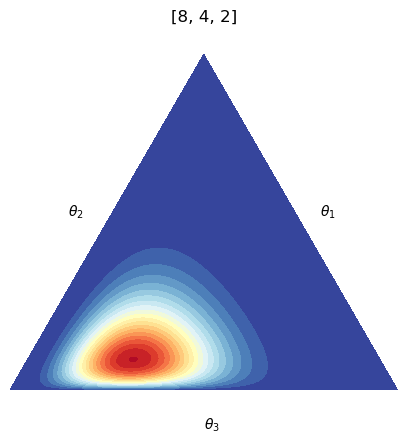

In [31]:
alpha_array = [8, 4, 2]
plot_Dirichlet_PDF_contour(alpha_array)

In [32]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023